In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import net2net
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)

plot.prepare_for_plots()

/usr/local/lib/python3.8/dist-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

# Net2Net:  distilling from full-training teacher

In [35]:
## reload(net2net)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)
    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_{i}.pt'))
    model = net2net.net2net_antidistil(teacher)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/n2n_full_{i}.pt')

Model 1
-------------------------------
-------------------------------
inp 785
t hid 129
s hid 257
out_num 65
inp 257
t hid 65
s hid 129
out_num 33
inp 129
t hid 33
s hid 65
out_num 11
Epoch 1
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.210976 

Epoch 2
-------------------------------


KeyboardInterrupt: 

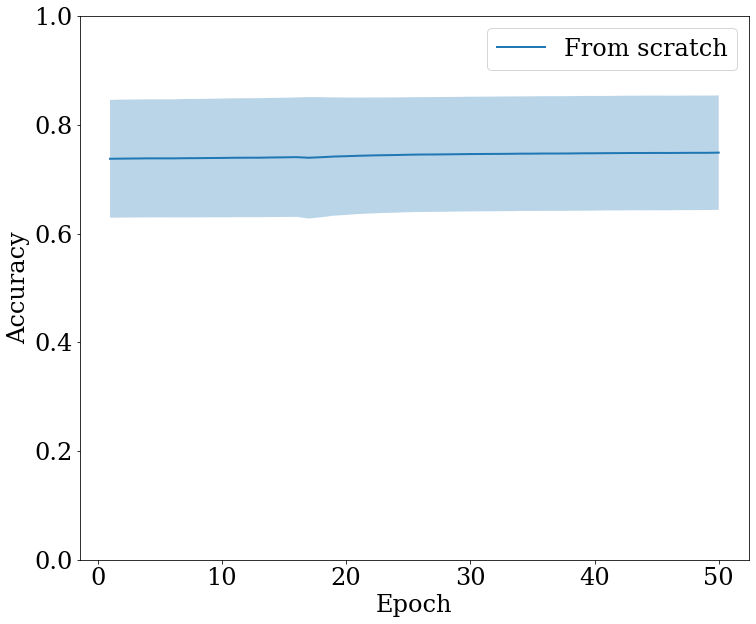

In [19]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

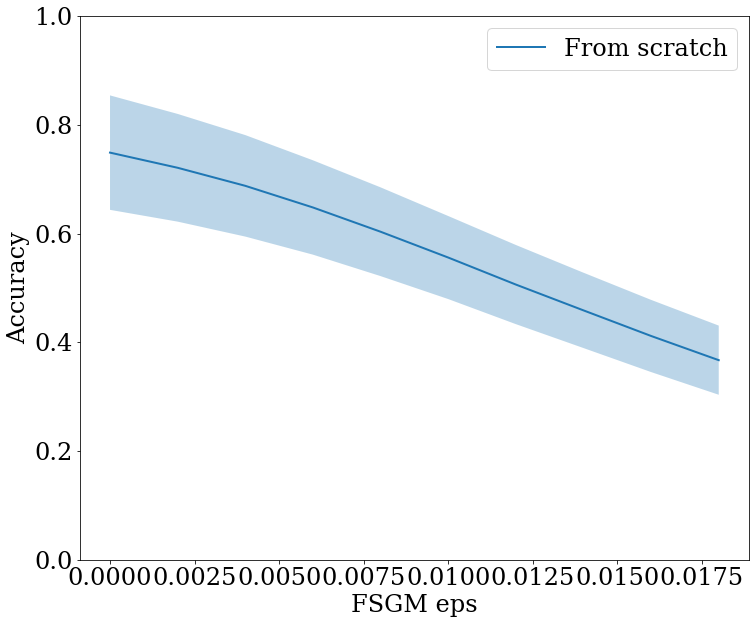

In [26]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

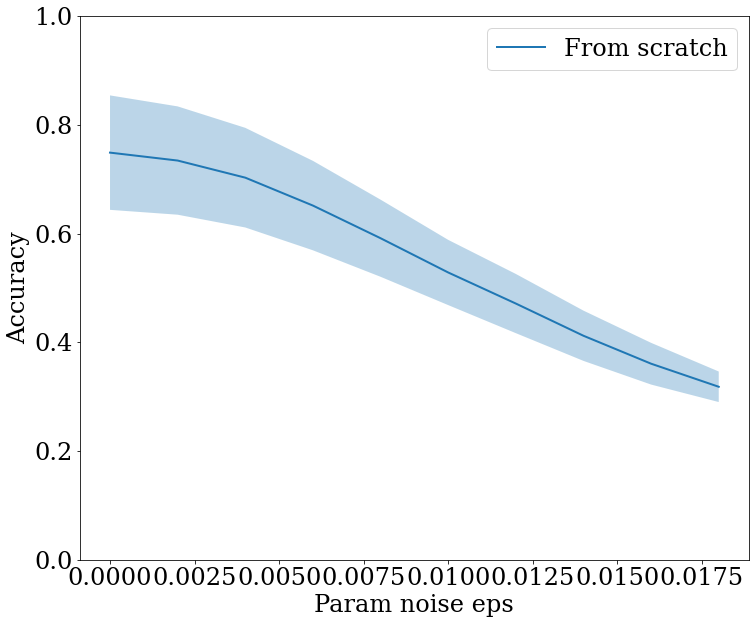

In [27]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [28]:
with open(pipeline.get_path()+'/history_full_n2n.json', 'w') as out:
    out.write(json.dumps(history))

# Zero: distilling from 5-classes trainer

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = net2net.net2net_antidistil(teacher)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/n2n_5_{i}.pt')

Model 10
-------------------------------
-------------------------------
inp 785
t hid 129
s hid 257
out_num 65
inp 257
t hid 65
s hid 129
out_num 33
inp 129
t hid 33
s hid 65
out_num 11
Epoch 1
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.549484 

Epoch 2
-------------------------------


Validation accuracy: 84.7%, Validation loss: 0.443072 

Epoch 3
-------------------------------


Validation accuracy: 85.3%, Validation loss: 0.416318 

Epoch 4
-------------------------------


Validation accuracy: 85.9%, Validation loss: 0.401369 

Epoch 5
-------------------------------


Validation accuracy: 86.4%, Validation loss: 0.390322 

Epoch 6
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.381591 

Epoch 7
-------------------------------


Validation accuracy: 86.8%, Validation loss: 0.377659 

Epoch 8
-------------------------------


Validation accuracy: 87.0%, Validation loss: 0.372289 

Epoch 9
-------------------------------


Validation accuracy: 86.9%, Validation loss: 0.371241 

Epoch 10
-------------------------------


Validation accuracy: 87.1%, Validation loss: 0.366173 

Epoch 11
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.367997 

Epoch 12
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.366204 

Epoch 13
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.368483 

Epoch 14
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.371383 

Epoch 15
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.370620 

Epoch 16
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.373081 

Epoch 17
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.377642 

Epoch 18
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.380177 

Epoch 19
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.377645 

Epoch 20
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.384523 

Epoch 21
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.388040 

Epoch 22
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.390355 

Epoch 23
-------------------------------


Validation accuracy: 87.7%, Validation loss: 0.390170 

Epoch 24
-------------------------------


Validation accuracy: 87.2%, Validation loss: 0.402394 

Epoch 25
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.403629 

Epoch 26
-------------------------------


Validation accuracy: 87.6%, Validation loss: 0.408142 

Epoch 27
-------------------------------


Validation accuracy: 87.3%, Validation loss: 0.414458 

Epoch 28
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.417690 

Epoch 29
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.423745 

Epoch 30
-------------------------------


Validation accuracy: 87.5%, Validation loss: 0.429334 



FSGM Accuracy [0.8747, 0.8332, 0.7946, 0.7532, 0.7105, 0.6691, 0.633, 0.5938, 0.558, 0.5258]


Noise Accuracy [0.8747, 0.87, 0.8698, 0.861, 0.8483, 0.8394, 0.8108, 0.7756, 0.7596, 0.7519]


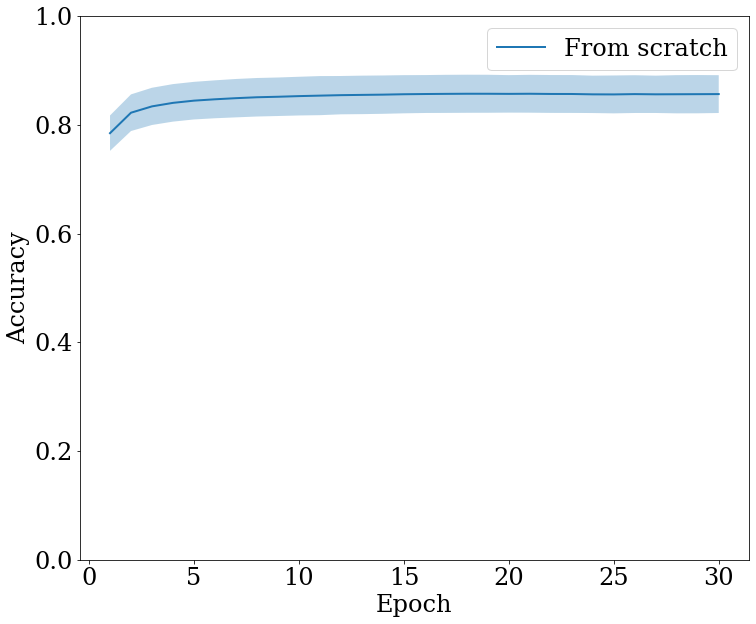

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

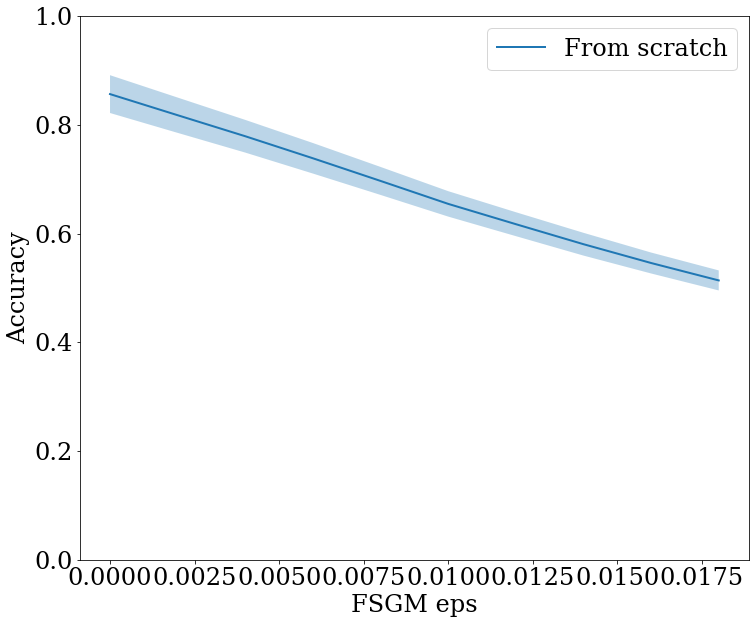

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

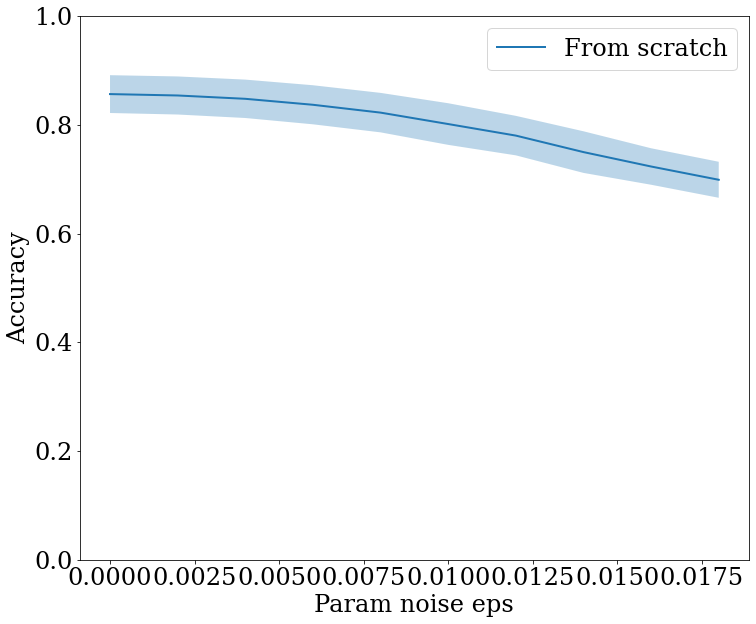

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [7]:
with open(pipeline.get_path()+'/history_5_n2n.json', 'w') as out:
    out.write(json.dumps(history))